# Setup Object Detection

In [1]:
import os
import platform



### Prepare Directories

In [2]:
CUSTOM_MODEL_NAME = 'custom_ssd_mobnet' 
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'custom_coco_label_map.pbtxt'
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8'
#PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz'
#PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations',CUSTOM_MODEL_NAME ),
    'IMAGE_PATH': os.path.join('..\..\images', 'ah-students'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'PROTOC_PATH':os.path.join('Tensorflow','protoc'),
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME),
    'COCO_OUTPUT_DIR': os.path.join('Tensorflow', 'workspace', "data", "coco")
 }

In [3]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [4]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

### Download Object Detection Github Repo

In [5]:
!pip install wget
import wget

In [ ]:
# Prepare label map

In [6]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

### Install Tensorflow Object Detection

In [6]:

if os.name=='posix':  
    if platform.system() == 'Darwin':
        url="https://github.com/protocolbuffers/protobuf/releases/download/v3.19.1/protoc-3.19.1-osx-x86_64.zip"
        wget.download(url)
        !mv protoc-3.19.1-osx-x86_64.zip {paths['PROTOC_PATH']}
        !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.19.1-osx-x86_64.zip
        os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))
    else: # Linux
        !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.19.1/protoc-3.19.1-win64.zip"
    wget.download(url)
    !move protoc-3.19.1-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.19.1-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

 57% [..........................................                                ]  876544 / 1524660

100% [..........................................................................] 1524660 / 1524660        1 file(s) moved.


object_detection/protos/*.proto: No such file or directory


Obtaining file:///C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace/Tensorflow/models/research/slim
  Running setup.py develop for slim


You should consider upgrading via the 'c:\software\python\tf\scripts\python.exe -m pip install --upgrade pip' command.


In [7]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.9.5: C:\Software\Python\tf\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-11-06 20:14:29.293918: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-06 20:14:30.511663: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2156 MB memory:  -> device: 0, name: Quadro T1000, pci bus id: 0000:01:00.0, compute capability: 7.5
C:\Software\Python\tf\lib\site-packages\object_detection\builders\model_builder.py:1100: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W1106 20:14:30.766219 10732 model_builder.p

I1106 20:14:38.358316 10732 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.1, depth_coefficient=1.2, resolution=260, dropout_rate=0.3, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=24, output_filters=40, kernel_size=5, num_repeat=2, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=40, output_filters=80, kernel_size=3, num_repeat=3, expand_ratio=6, strides=(2, 2), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=80, output_filters=112, kernel_size=5, num_repeat=3, ex

In [3]:
# Test import object_detection
import object_detection

In [11]:
wget.download(PRETRAINED_MODEL_URL)
if os.name =='posix':
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt': 
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20518283 / 20518283        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8/saved_model/variables/variables.index


## Download COCO data https://cocodataset.org/#download
- 2017 Train images [118K/18/GB)]
- 2017 Val Images [5K/1GB]
- 2017 Test images [41K/6GB]
- 2017 Train/Val annotations [241MB]
- 2017 Testing Image info [1MB]
unzip above zip files in C:/Work/ML/Carina/Object-Detection/data/coco or the directory you select

## Create TF records from COCO data
https://github.com/tensorflow/models/blob/master/research/object_detection/dataset_tools/create_coco_tf_record.py

In [14]:
COCO_DATA_DIR = "C:/Work/ML/Carina/Object-Detection/data/coco"
COCO_TRAIN_IMAGE_DIR = os.path.join(COCO_DATA_DIR, "train2017")
COCO_VAL_IMAGE_DIR = os.path.join(COCO_DATA_DIR, "val2017")
COCO_TEST_IMAGE_DIR = os.path.join(COCO_DATA_DIR, "test2017")
COCO_TRAIN_ANNOTATIONS_FILE = os.path.join(COCO_DATA_DIR, "annotations_trainval2017", "annotations", "instances_train2017.json")
COCO_VAL_ANNOTATIONS_FILE = os.path.join(COCO_DATA_DIR,"annotations_trainval2017", "annotations", "instances_val2017.json")
COCO_TESTDEV_ANNOTATIONS_FILE = os.path.join(COCO_DATA_DIR,"annotations", "image_info_test-dev2017.json")
COCO_TF_RECORD_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'dataset_tools', 'create_coco_tf_record.py')
!python {COCO_TF_RECORD_SCRIPT} --logtostderr \
  --train_image_dir={COCO_TRAIN_IMAGE_DIR} \
  --val_image_dir={COCO_VAL_IMAGE_DIR} \
  --test_image_dir={COCO_TEST_IMAGE_DIR} \
  --train_annotations_file={COCO_TRAIN_ANNOTATIONS_FILE} \
  --val_annotations_file={COCO_VAL_ANNOTATIONS_FILE} \
  --testdev_annotations_file={COCO_TESTDEV_ANNOTATIONS_FILE} \
  --output_dir={paths['COCO_OUTPUT_DIR']}

I1122 12:32:50.013045 14204 create_coco_tf_record.py:399] Found groundtruth annotations. Building annotations index.
I1122 12:32:50.375039 14204 create_coco_tf_record.py:411] 1021 images are missing annotations.
I1122 12:32:50.375039 14204 create_coco_tf_record.py:441] On image 0 of 118287
I1122 12:32:50.775501 14204 create_coco_tf_record.py:441] On image 100 of 118287
I1122 12:32:51.136279 14204 create_coco_tf_record.py:441] On image 200 of 118287
I1122 12:32:51.520379 14204 create_coco_tf_record.py:441] On image 300 of 118287
I1122 12:32:51.888892 14204 create_coco_tf_record.py:441] On image 400 of 118287
I1122 12:32:52.218254 14204 create_coco_tf_record.py:441] On image 500 of 118287
I1122 12:32:52.556442 14204 create_coco_tf_record.py:441] On image 600 of 118287
I1122 12:32:52.922410 14204 create_coco_tf_record.py:441] On image 700 of 118287
I1122 12:32:53.255031 14204 create_coco_tf_record.py:441] On image 800 of 118287
I1122 12:32:53.613764 14204 create_coco_tf_record.py:441] On 

I1122 12:34:02.910806 14204 create_coco_tf_record.py:441] On image 20900 of 118287
I1122 12:34:03.294466 14204 create_coco_tf_record.py:441] On image 21000 of 118287
I1122 12:34:03.624117 14204 create_coco_tf_record.py:441] On image 21100 of 118287
I1122 12:34:03.990641 14204 create_coco_tf_record.py:441] On image 21200 of 118287
I1122 12:34:04.364880 14204 create_coco_tf_record.py:441] On image 21300 of 118287
I1122 12:34:04.655578 14204 create_coco_tf_record.py:441] On image 21400 of 118287
I1122 12:34:04.955364 14204 create_coco_tf_record.py:441] On image 21500 of 118287
I1122 12:34:05.310466 14204 create_coco_tf_record.py:441] On image 21600 of 118287
I1122 12:34:05.608801 14204 create_coco_tf_record.py:441] On image 21700 of 118287
I1122 12:34:05.980159 14204 create_coco_tf_record.py:441] On image 21800 of 118287
I1122 12:34:06.307391 14204 create_coco_tf_record.py:441] On image 21900 of 118287
I1122 12:34:06.675224 14204 create_coco_tf_record.py:441] On image 22000 of 118287
I112

I1122 12:37:52.234129 14204 create_coco_tf_record.py:441] On image 87800 of 118287
I1122 12:37:52.600092 14204 create_coco_tf_record.py:441] On image 87900 of 118287
I1122 12:37:52.998743 14204 create_coco_tf_record.py:441] On image 88000 of 118287
I1122 12:37:53.398853 14204 create_coco_tf_record.py:441] On image 88100 of 118287
I1122 12:37:53.770571 14204 create_coco_tf_record.py:441] On image 88200 of 118287
I1122 12:37:54.152084 14204 create_coco_tf_record.py:441] On image 88300 of 118287
I1122 12:37:54.517499 14204 create_coco_tf_record.py:441] On image 88400 of 118287
I1122 12:37:54.836195 14204 create_coco_tf_record.py:441] On image 88500 of 118287
I1122 12:37:55.235645 14204 create_coco_tf_record.py:441] On image 88600 of 118287
I1122 12:37:55.591135 14204 create_coco_tf_record.py:441] On image 88700 of 118287
I1122 12:37:55.877659 14204 create_coco_tf_record.py:441] On image 88800 of 118287
I1122 12:37:56.227421 14204 create_coco_tf_record.py:441] On image 88900 of 118287
I112

## Prepar original label map

In [21]:
# Prepare Label Map

original_map = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'data','mscoco_label_map.pbtxt')
if os.name =='posix':
    !cp {original_map} {files['LABELMAP']}
if os.name == 'nt':
    !copy {original_map} {files['LABELMAP']}

        1 file(s) copied.


##  Copy Model Config to Training Folder

In [22]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


## Update Config For Training

In [23]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [24]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [25]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [26]:
# Create two arrays for traing records and testing records
tfrecords_dir = "C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace/Tensorflow/workspace/data/coco"
train_tfrecords = []
test_tfrecords = []
if (os.path.isdir(tfrecords_dir)):
    for full_path, d_names, f_names in os.walk(tfrecords_dir):
        for f in f_names: 
          if (f.startswith('coco_testdev.record')):
              test_tfrecords.append(os.path.join(full_path, f))
          elif (f.startswith('coco_train.record')):
          #elif (f.startswith('coco_val.record')):
              train_tfrecords.append(os.path.join(full_path, f))
#train_tfrecords = [os.path.join(tfrecords_dir, 'coco_train.record*')]
#test_tfrecords = [os.path.join(tfrecords_dir, 'coco_testdev.record*')]
print("Train TFRecords:")
for element in train_tfrecords:
    print(element)
print("")
print("Test TFRecords:")
for element in test_tfrecords:
    print(element)
print("")

Train TFRecords:
C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace/Tensorflow/workspace/data/coco\coco_train.record-00000-of-00100
C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace/Tensorflow/workspace/data/coco\coco_train.record-00001-of-00100
C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace/Tensorflow/workspace/data/coco\coco_train.record-00002-of-00100
C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace/Tensorflow/workspace/data/coco\coco_train.record-00003-of-00100
C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace/Tensorflow/workspace/data/coco\coco_train.record-00004-of-00100
C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace/Tensorflow/workspace/data/coco\coco_train.record-00005-of-00100
C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace/Tensorflow/workspace/data/coco\coco_train.record-00006-of-00100
C:/Work/ML/Carina/Object-Detection/Object-Detection-Repo/workspace

In [27]:
pipeline_config.model.ssd.num_classes = 90
pipeline_config.train_config.batch_size = 64 #128 will be OOM on my 32GB Laptop
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = train_tfrecords
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = test_tfrecords

In [28]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [29]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

## Create Label Map

In [7]:
labels = [{'name':'s50', 'id':1}, {'name':'s51', 'id':2},{'name':'s52', 'id':3},{'name':'s53', 'id':4},{'name':'s54', 'id':5}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## Create TF records

In [8]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [9]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


## Train the model

In [17]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [18]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [20]:
#print ("Disable GPU if necessary")
#Small GPU mmemory can't handle the training, for example 4GB memory
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
# Set environment variable CUDA_VISIBLE_DEVICES=-1
# on Windows Powershell run:  $ENV:CUDA_VISIBLE_DEVICES=-1
print(command)

# time <command> or
# Measure-Command {command}

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\custom_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\custom_ssd_mobnet\pipeline.config --num_train_steps=2000


In [ ]:
# Install missing moduless
# abs1-py may be old which not meet Ojbect-Detection requirement
pip uninstall absl-py
pip install absl-py

Copy and run above command in current path from terminal:

In [39]:
if os.name == 'nt':
  !powershell pwd
else:
  !pwd


Path                                                              
----                                                              
C:\work\ML\Carina\Object-Detection\Object-Detection-Repo\workspace




In [ ]:
#!{command}

## Evaluate the Model

In [20]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [21]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\ah_students_ssd_mobnet --pipeline_config_path=Tensorflow\workspace\models\ah_students_ssd_mobnet\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\ah_students_ssd_mobnet


In [ ]:
# Again run this from terminal instead of here
# !{command}

## Load Train Model From Checkpoint

In [22]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [23]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

## Detect from an Image

In [24]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [25]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [36]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 's12345300519-ahs.bmp')
#IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'calculator-4.jpg')

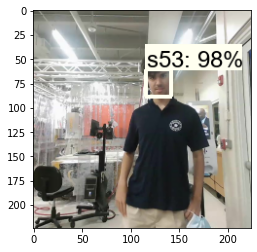

In [37]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

## Real Time Detections from your Webcam

In [33]:
!pip uninstall opencv-python-headless -y

Found existing installation: opencv-python-headless 4.5.4.58
Uninstalling opencv-python-headless-4.5.4.58:
  Successfully uninstalled opencv-python-headless-4.5.4.58

ERROR: Exception:
Traceback (most recent call last):
  File "c:\software\python\tf\lib\site-packages\pip\_internal\cli\base_command.py", line 180, in _main
    status = self.run(options, args)
  File "c:\software\python\tf\lib\site-packages\pip\_internal\commands\uninstall.py", line 89, in run
    uninstall_pathset.commit()
  File "c:\software\python\tf\lib\site-packages\pip\_internal\req\req_uninstall.py", line 442, in commit
    self._moved_paths.commit()
  File "c:\software\python\tf\lib\site-packages\pip\_internal\req\req_uninstall.py", line 282, in commit
    save_dir.cleanup()
  File "c:\software\python\tf\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "c:\software\python\tf\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 341, in wrapped_f
    return self(f, *args, **kw)
  File "c:\software\python\tf\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 432, in __call__
    do = self.iter(retry_state=retry_stat


  File "C:\Software\Python\Python39\lib\concurrent\futures\_base.py", line 438, in result
    return self.__get_result()
  File "C:\Software\Python\Python39\lib\concurrent\futures\_base.py", line 390, in __get_result
    raise self._exception
  File "c:\software\python\tf\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 435, in __call__
    result = fn(*args, **kwargs)
  File "c:\software\python\tf\lib\site-packages\pip\_internal\utils\misc.py", line 135, in rmtree
    shutil.rmtree(dir, ignore_errors=ignore_errors, onerror=rmtree_errorhandler)
  File "C:\Software\Python\Python39\lib\shutil.py", line 740, in rmtree
    return _rmtree_unsafe(path, onerror)
  File "C:\Software\Python\Python39\lib\shutil.py", line 618, in _rmtree_unsafe
    onerror(os.unlink, fullname, sys.exc_info())
  File "C:\Software\Python\Python39\lib\shutil.py", line 616, in _rmtree_unsafe
    os.unlink(fullname)
PermissionError: [WinError 5] Access is denied: 'C:\\Users\\wangxi01\\AppData\\Local\\Temp\\p

In [42]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    #cv2.imshow('object detection',  image_np_with_detections)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

ValueError: in user code:

    <ipython-input-23-1206d6034fa6>:11 detect_fn  *
        image, shapes = detection_model.preprocess(image)
    c:\software\python\tf\lib\site-packages\object_detection\meta_architectures\ssd_meta_arch.py:484 preprocess  *
        normalized_inputs, self._image_resizer_fn)
    c:\software\python\tf\lib\site-packages\object_detection\utils\shape_utils.py:492 resize_images_and_return_shapes  *
        outputs = static_or_dynamic_map_fn(
    c:\software\python\tf\lib\site-packages\object_detection\utils\shape_utils.py:246 static_or_dynamic_map_fn  *
        outputs = [fn(arg) for arg in tf.unstack(elems)]
    c:\software\python\tf\lib\site-packages\object_detection\core\preprocessor.py:3327 resize_image  *
        new_image = tf.image.resize_images(
    c:\software\python\tf\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper  **
        return target(*args, **kwargs)
    c:\software\python\tf\lib\site-packages\tensorflow\python\ops\image_ops_impl.py:1538 resize_images
        return _resize_images_common(
    c:\software\python\tf\lib\site-packages\tensorflow\python\ops\image_ops_impl.py:1396 _resize_images_common
        raise ValueError('\'images\' must have either 3 or 4 dimensions.')

    ValueError: 'images' must have either 3 or 4 dimensions.


## Freezing the Graph

In [43]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [44]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\ah_students_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\ah_students_ssd_mobnet --output_directory=Tensorflow\workspace\models\ah_students_ssd_mobnet\export


The script only export the first checkpoint: ckpt-1 => ckpt-0. You can manually copy other ckpts from paths['CHECKPOINT_PATH']  to export directory

"clearbackpack" video detection has too many wrong detection. Will investigate